In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
data = ImageDataBunch.from_folder('dataset', ds_tfms=get_transforms(), size=224)

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [5]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.340189,0.023133,0.008333,01:09
1,0.151095,0.075329,0.008333,01:04
2,0.100970,0.057792,0.008333,01:04
3,0.070709,0.062805,0.008333,01:04


In [4]:
data = (ImageList.from_folder('dataset/train') 
        .split_by_rand_pct()              
        .label_from_folder()            
        .transform(get_transforms(), size=224)       
        .databunch(bs=64)
        .normalize(imagenet_stats))

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


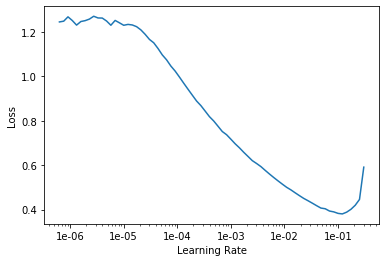

In [13]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


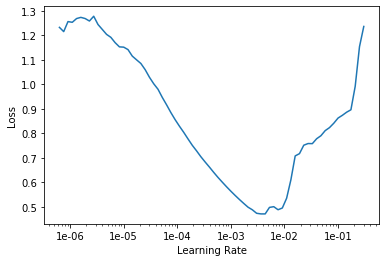

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(16, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.120299,0.030054,0.011111,01:01
1,0.088540,0.018088,0.003704,01:01
2,0.066954,0.014636,0.003704,01:09
3,0.048977,0.018687,0.007407,01:08
4,0.038656,0.011402,0.003704,00:59
5,0.030846,0.016284,0.007407,00:59
6,0.025675,0.009979,0.007407,00:58
7,0.020740,0.006709,0.003704,00:58
8,0.024031,0.008632,0.003704,01:00
9,0.017433,0.005517,0.003704,00:59


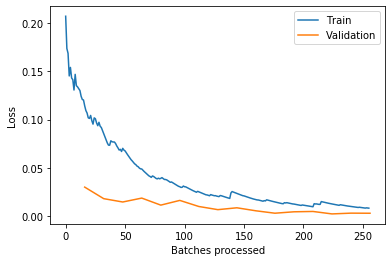

In [18]:
learn.recorder.plot_losses()

In [6]:
learn.fit_one_cycle(40, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.694356,0.108170,0.040741,01:05
1,0.394945,0.031396,0.007407,01:02
2,0.254758,0.018508,0.007407,01:01
3,0.176734,0.009832,0.003704,01:01
4,0.134544,0.005433,0.003704,01:01
5,0.096495,0.024141,0.003704,01:03
6,0.071994,0.027660,0.003704,01:04
7,0.058068,0.001039,0.000000,01:04
8,0.051067,0.001172,0.000000,01:06
9,0.042175,0.003031,0.000000,01:05


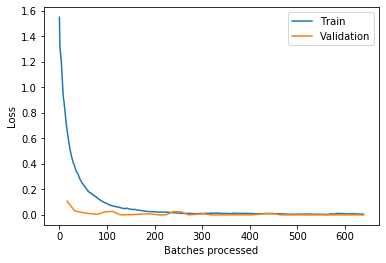

In [7]:
learn.recorder.plot_losses()

In [24]:
learn.fit_one_cycle(30, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.244334,0.002912,0.000000,01:10
1,0.125044,0.015367,0.007407,01:06
2,0.083446,0.016082,0.007407,01:07
3,0.062492,0.002104,0.000000,01:08
4,0.048448,0.000267,0.000000,01:10
5,0.035027,0.027052,0.007407,01:12
6,0.036760,0.285561,0.040741,01:09
7,0.062537,2.701808,0.307407,01:09
8,0.070846,0.069449,0.022222,01:09
9,0.096466,0.004575,0.000000,01:09


In [14]:
learn.save('stage-1-50')

In [8]:
learn.export("resnet50_40")


In [17]:
learn = load_learner('dataset')


In [52]:
img = open_image('images/3.jpg')
learn.predict(img)

(Category mask, tensor(0), tensor([1.0000e+00, 1.2256e-08]))